# CHAPTER 4
> Fast Book Chapter 4 summary

- toc: true 
- badges: true
- comments: true
- categories: [fastbook]

In [1]:
#hide
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
%config Completer.use_jedi = False


In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')


> Note: 'untar_data' come from fastai library it downloads the data and untar it if it didn't already and returns the destination folder.

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

> Tip: Check it with '??'

In [4]:
??untar_data

> Note: path returns:

In [5]:
path

Path('/home/niyazi/.fastai/data/mnist_sample')

> Note: what is inside the current folder? this where the jupyter notebook works. '!' at the beginning means the command works on the terminal.

In [6]:
!ls

01_intro.ipynb		 15_arch_details.ipynb	     LICENSE
02_production.ipynb	 16_accel_sgd.ipynb	     README_bn.md
03_ethics.ipynb		 17_foundations.ipynb	     README_es.md
04_mnist_basics.ipynb	 18_CAM.ipynb		     README_id.md
05_pet_breeds.ipynb	 19_learner.ipynb	     README_ko.md
06_multicat.ipynb	 2021-07-15-chapter-4.ipynb  README.md
07_sizing_and_tta.ipynb  2021-07-15-Test.ipynb	     README_zh.md
08_collab.ipynb		 20_conclusion.ipynb	     requirements.txt
09_tabular.ipynb	 app_blog.ipynb		     sandbox
10_nlp.ipynb		 app_jupyter.ipynb	     settings.ini
11_midlevel_data.ipynb	 clean			     tools
12_nlp_dive.ipynb	 CODE_OF_CONDUCT.md	     utils.py
13_convolutions.ipynb	 environment.yml
14_resnet.ipynb		 images


> Note: can be used like this too.

In [7]:
!ls /home/niyazi/.fastai/data/mnist_sample/train -d

/home/niyazi/.fastai/data/mnist_sample/train


> Note: also like this:

In [8]:
!ls /home/niyazi/.fastai/data/mnist_sample/train/3 -d

/home/niyazi/.fastai/data/mnist_sample/train/3


> Note: getting the tree view also possible:

In [9]:
!tree /home/niyazi/.fastai/data/mnist_sample/ -d

/home/niyazi/.fastai/data/mnist_sample/
├── train
│   ├── 3
│   └── 7
└── valid
    ├── 3
    └── 7

6 directories


> Note: only Directories -d:

In [10]:
!tree /home/niyazi/.fastai/data/mnist_sample/ -d

/home/niyazi/.fastai/data/mnist_sample/
├── train
│   ├── 3
│   └── 7
└── valid
    ├── 3
    └── 7

6 directories


In [11]:
#hide
Path.BASE_PATH = path

> Note: 'ls' is method by fastai similiar the Python's list fuction but more powerful.

In [12]:
path.ls()

(#3) [Path('labels.csv'),Path('train'),Path('valid')]

> Note: Check this usage:

In [13]:
(path/'train')

Path('train')

In [14]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

> Note: there are  two folders under training folder

In [15]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()


> Note: this code returns and ordered list of paths

In [16]:
im3_path = threes[1]
im3 = Image.open(im3_path)
type(im3)
#im3

PIL.PngImagePlugin.PngImageFile

> Note: 'Image' class id from The Python Imaging Library (PIL)

In [17]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

> Note: this is how it looks  some part of the image in the NumPy array

The 4:10 indicates we requested the rows from index 4 (included) to 10 (not included) and the same for the columns. NumPy indexes from top to bottom and left to right, so this section is located in the top-left corner of the image. Here's the same thing as a PyTorch tensor:


In [18]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

> Note: It is possible to convert it to a tansor as well.

In [19]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('OrRd')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [20]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

> Note: 'sevens' are still list of paths. 'o' is a path in the list, then with the list comprehension we use the path to read the image, then cast the image into tensor.(Same for threes)

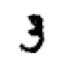

In [21]:
show_image(three_tensors[0]);

> Note: Show image shows the first tensor as image

<AxesSubplot:>

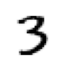

In [22]:
show_image(tensor(im3))

> Note: check this  in more straight way (im3>tensor>image) 

In [23]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [24]:
type(stacked_sevens)

torch.Tensor

In [25]:
type(stacked_sevens[0])

torch.Tensor

In [26]:
type(seven_tensors)

list

> Note: now we turn our list into a tensor size of ([6131, 28, 28])

In [27]:
len(stacked_threes.shape)

3

> Note: This is rank (lenght of the shape)

In [28]:
stacked_threes.ndim

3

> Note: This is more direct way to get it. (ndim)

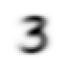

In [29]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

> Note: This is the mean of the all tensors through first axis. 'Perfect three'

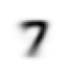

In [30]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

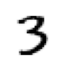

In [31]:
a_3 = stacked_threes[1]
show_image(a_3);

> Note: Then we need to calculate the distance between the 'perfect' and ordinary three.

> Note: two methods for getting the distance L1 Norm and MSE second one is panelize bigger mistake more havil, L1 is uniform.


In [32]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [33]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

> Note: It is obvious that a_3 is closer to the perfect 3 so our approach worked at this time. (Both in L1 and MSE)

In [34]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

> Note: Same available from Pytorch function torch.nn.functional as F ( for mse, manually take the sqrt)

> Important: (from notebook) If you don't know what C is, don't worry as you won't need it at all. In a nutshell, it's a low-level (low-level means more similar to the language that computers use internally) language that is very fast compared to Python. To take advantage of its speed while programming in Python, try to avoid as much as possible writing loops, and replace them by commands that work directly on arrays or tensors.

### To create an array or tensor

In [35]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

In [36]:
arr  # numpy

array([[1, 2, 3],
       [4, 5, 6]])

In [37]:
tns  # pytorch

tensor([[1, 2, 3],
        [4, 5, 6]])

In [38]:
tns[:,1]

tensor([2, 5])

In [39]:
tns[1,1:3]

tensor([5, 6])

In [40]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [41]:
tns.type()

'torch.LongTensor'

In [42]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

### Validation set

In [43]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

### a-3 and mean3 comes from above

In [44]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

### This is broadcasting:

#### I think this an example of not using loops which slows down the process (check above important tag)

In [45]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1270, 0.1254, 0.1114,  ..., 0.1494, 0.1097, 0.1365]),
 torch.Size([1010]))

#### here is another example. Shapes don't match.

In [46]:
tensor([1,2,3]) + tensor(1)

tensor([2, 3, 4])

In [47]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])

In [48]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [49]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

#### here is an another broadcasting for all validation set:

In [50]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

#### Accuracy of our 'perfect 3 and 7'

In [51]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

### Stochastic Gradient Descent (SGD)

#### Arthur Samues Machine Learning process:

- Initialize the weights.
- For each image, use these weights to predict whether it appears to be a 3 or a 7.
- Based on these predictions, calculate how good the model is (its loss).
- Calculate the gradient, which measures for each weight, how changing that weight would change the loss (SGD)
- Step (that is, change) all the weights based on that calculation.
- Go back to the step 2, and repeat the process.
- Iterate until you decide to stop the training process (for instance, because the model is good enough or you don't want to wait any longer).


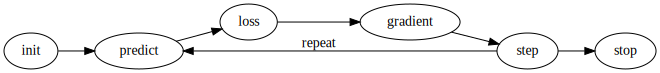

In [52]:
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

#### GD example

In [53]:
def f(x): return x**2

/home/niyazi/anaconda3/envs/fastbook/lib/python3.8/site-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448278899/work/aten/src/ATen/native/RangeFactories.cpp:25.)
  x = torch.linspace(min,max)


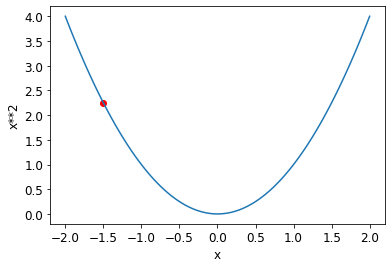

In [54]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

![](https://image.flaticon.com/icons/svg/36/36686.svg)